In [1]:
# Parameters
file_path = "SAP.csv"


<a href="https://colab.research.google.com/github/AshtonGlover/stock-prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [3]:
import pandas as pd
import tensorflow

truncated_name = file_path.split(".")[0]
file_path = "datasets/" + file_path if 'file_path' in globals() else 'datasets/MSFT.csv'

df = pd.read_csv(file_path)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-23,138.479996,140.550003,138.479996,140.139999,138.403183,680700
1,2023-08-24,138.820007,138.860001,135.460007,135.580002,133.899689,837000
2,2023-08-25,136.910004,137.979996,135.389999,137.460007,135.756393,793300
3,2023-08-28,137.940002,138.720001,137.559998,138.339996,136.625488,556700
4,2023-08-29,137.550003,140.139999,137.550003,140.050003,138.314301,403100
...,...,...,...,...,...,...,...
247,2024-08-16,215.630005,217.100006,215.160004,216.169998,216.169998,546500
248,2024-08-19,216.160004,219.059998,215.899994,219.039993,219.039993,558700
249,2024-08-20,219.179993,220.119995,217.130005,217.770004,217.770004,567900
250,2024-08-21,218.820007,219.500000,217.800003,218.869995,218.869995,471800


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2023-08-23,140.139999
1,2023-08-24,135.580002
2,2023-08-25,137.460007
3,2023-08-28,138.339996
4,2023-08-29,140.050003
...,...,...
247,2024-08-16,216.169998
248,2024-08-19,219.039993
249,2024-08-20,217.770004
250,2024-08-21,218.869995


In [5]:
import datetime

def strToDate(s):
  split_date = s.split('-')
  day, month, year = int(split_date[2]), int(split_date[1]), int(split_date[0])
  return datetime.datetime(year = year, month = month, day = day)

In [6]:
df['Date'] = df['Date'].apply(strToDate)
df['Date']

/var/folders/t5/bfwy3czx4ks1lybmc4f9rd5m0000gn/T/ipykernel_88403/3418807745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(strToDate)


0     2023-08-23
1     2023-08-24
2     2023-08-25
3     2023-08-28
4     2023-08-29
         ...    
247   2024-08-16
248   2024-08-19
249   2024-08-20
250   2024-08-21
251   2024-08-22
Name: Date, Length: 252, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2023-08-23,140.139999
2023-08-24,135.580002
2023-08-25,137.460007
2023-08-28,138.339996
2023-08-29,140.050003
...,...
2024-08-16,216.169998
2024-08-19,219.039993
2024-08-20,217.770004


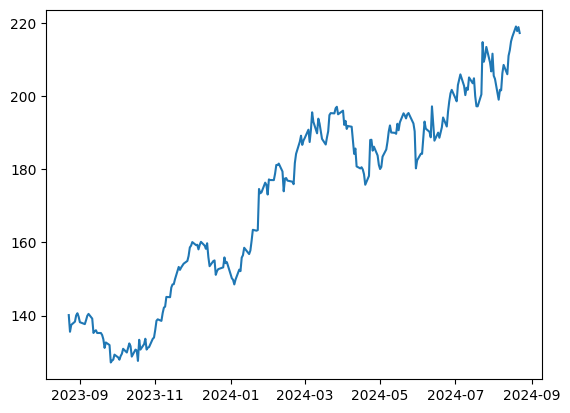

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = strToDate(first_date_str)
  last_date  = strToDate(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(len(df_subset))
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df,
                                '2023-10-05',
                                '2024-08-22',
                                n=30)
windowed_df

,Target Date,Target-30,Target-29,Target-28,Target-27,Target-26,Target-25,Target-24,Target-23,Target-22,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-10-05,140.139999,135.580002,137.460007,138.339996,140.050003,140.639999,139.690002,138.190002,137.669998,...,132.649994,131.949997,127.180000,127.680000,127.949997,129.320007,128.559998,127.940002,128.929993,129.559998
1,2023-10-06,135.580002,137.460007,138.339996,140.050003,140.639999,139.690002,138.190002,137.669998,138.740005,...,131.949997,127.180000,127.680000,127.949997,129.320007,128.559998,127.940002,128.929993,129.559998,130.919998
2,2023-10-09,137.460007,138.339996,140.050003,140.639999,139.690002,138.190002,137.669998,138.740005,139.949997,...,127.180000,127.680000,127.949997,129.320007,128.559998,127.940002,128.929993,129.559998,130.919998,129.910004
3,2023-10-10,138.339996,140.050003,140.639999,139.690002,138.190002,137.669998,138.740005,139.949997,140.460007,...,127.680000,127.949997,129.320007,128.559998,127.940002,128.929993,129.559998,130.919998,129.910004,131.199997
4,2023-10-11,140.050003,140.639999,139.690002,138.190002,137.669998,138.740005,139.949997,140.460007,139.169998,...,127.949997,129.320007,128.559998,127.940002,128.929993,129.559998,130.919998,129.910004,131.199997,132.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2024-08-16,205.940002,202.789993,200.279999,202.289993,201.729996,205.110001,203.509995,204.869995,200.009995,...,199.029999,201.729996,201.589996,206.279999,208.529999,205.979996,211.020004,212.550003,214.940002,216.169998
218,2024-08-19,202.789993,200.279999,202.289993,201.729996,205.110001,203.509995,204.869995,200.009995,197.229996,...,201.729996,201.589996,206.279999,208.529999,205.979996,211.020004,212.550003,214.940002,216.169998,219.039993
219,2024-08-20,200.279999,202.289993,201.729996,205.110001,203.509995,204.869995,200.009995,197.229996,197.210007,...,201.589996,206.279999,208.529999,205.979996,211.020004,212.550003,214.940002,216.169998,219.039993,217.770004
220,2024-08-21,202.289993,201.729996,205.110001,203.509995,204.869995,200.009995,197.229996,197.210007,200.470001,...,206.279999,208.529999,205.979996,211.020004,212.550003,214.940002,216.169998,219.039993,217.770004,218.869995


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  dfasnp = windowed_dataframe.to_numpy()

  dates = dfasnp[:, 0]

  middle_matrix = dfasnp[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = dfasnp[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((222,), (222, 30, 1), (222,))

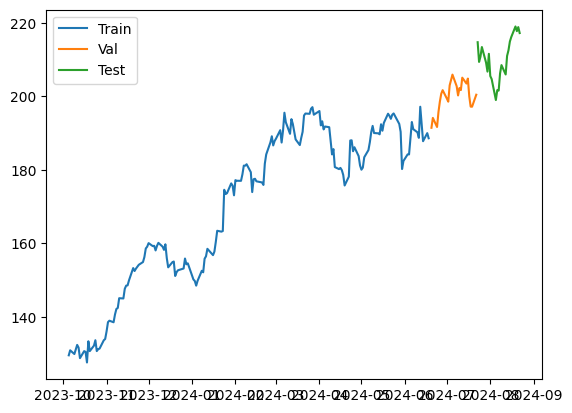

In [11]:
q_80 = int(len(dates) * 0.8)
q_90 = int(len(dates) * 0.9)

dates_train, x_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, x_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, x_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Val', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
                    layers.Input(shape=(30, 1)),

                    layers.LSTM(units=256),

                    layers.Dense(units=256, activation='relu'),
                    layers.Dense(units=128, activation='relu'),
                    layers.Dense(units=64, activation='relu'),
                    layers.Dense(units=32, activation='relu'),
                    layers.Dense(units=1)
                ])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 100)



Epoch 1/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - loss: 28088.7188 - mean_absolute_error: 165.9160

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29074.3184 - mean_absolute_error: 169.1233 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 28989.7441 - mean_absolute_error: 168.8901 - val_loss: 38281.6992 - val_mean_absolute_error: 195.6176


Epoch 2/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 28156.4805 - mean_absolute_error: 166.6133

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27116.2012 - mean_absolute_error: 163.3279

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27058.2090 - mean_absolute_error: 163.1461 - val_loss: 34584.0273 - val_mean_absolute_error: 185.9260


Epoch 3/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25891.3828 - mean_absolute_error: 159.8509

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24045.5332 - mean_absolute_error: 153.5394

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23570.2852 - mean_absolute_error: 151.9323 - val_loss: 25993.1582 - val_mean_absolute_error: 161.1749


Epoch 4/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17757.0586 - mean_absolute_error: 131.5352

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15409.7686 - mean_absolute_error: 121.6860

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14723.8232 - mean_absolute_error: 118.6135 - val_loss: 10379.9277 - val_mean_absolute_error: 101.7962


Epoch 5/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 5326.7812 - mean_absolute_error: 68.5798

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 4457.5859 - mean_absolute_error: 61.4867

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3531.0500 - mean_absolute_error: 52.3806

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3372.2861 - mean_absolute_error: 50.7439 - val_loss: 49.1890 - val_mean_absolute_error: 5.5338


Epoch 6/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2166.4473 - mean_absolute_error: 38.3749

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 2623.9087 - mean_absolute_error: 43.4709

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2709.6633 - mean_absolute_error: 44.6122

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2716.4097 - mean_absolute_error: 44.8241 - val_loss: 114.7462 - val_mean_absolute_error: 9.8795


Epoch 7/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1007.4899 - mean_absolute_error: 23.0184

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 895.3299 - mean_absolute_error: 22.6257 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 792.9096 - mean_absolute_error: 22.3161 - val_loss: 2667.5107 - val_mean_absolute_error: 51.4929


Epoch 8/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1065.6630 - mean_absolute_error: 29.4033

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1035.3634 - mean_absolute_error: 28.1191

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1011.9728 - mean_absolute_error: 27.6572 - val_loss: 2380.8772 - val_mean_absolute_error: 48.6322


Epoch 9/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 736.8636 - mean_absolute_error: 22.1841

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 666.8984 - mean_absolute_error: 21.9374

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 640.9048 - mean_absolute_error: 21.6144 - val_loss: 705.3578 - val_mean_absolute_error: 26.2624


Epoch 10/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 552.4258 - mean_absolute_error: 19.0232

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 541.1360 - mean_absolute_error: 18.6468

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 541.6366 - mean_absolute_error: 18.5960 - val_loss: 358.3804 - val_mean_absolute_error: 18.5147


Epoch 11/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 797.3927 - mean_absolute_error: 23.2170

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 650.6217 - mean_absolute_error: 20.5640

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 617.6541 - mean_absolute_error: 20.1108 - val_loss: 945.0507 - val_mean_absolute_error: 30.4881


Epoch 12/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 527.5386 - mean_absolute_error: 21.3697

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 463.0870 - mean_absolute_error: 19.7639

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 462.3536 - mean_absolute_error: 19.6829 - val_loss: 1236.8661 - val_mean_absolute_error: 34.9493


Epoch 13/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 507.4073 - mean_absolute_error: 20.9481

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 472.1697 - mean_absolute_error: 19.9964

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 466.9525 - mean_absolute_error: 19.8288 - val_loss: 983.7109 - val_mean_absolute_error: 31.1190


Epoch 14/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 396.4822 - mean_absolute_error: 17.8736

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 381.3233 - mean_absolute_error: 17.5541

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 387.3648 - mean_absolute_error: 17.6642 - val_loss: 661.1382 - val_mean_absolute_error: 25.4152


Epoch 15/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 461.1113 - mean_absolute_error: 19.1292

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 411.4457 - mean_absolute_error: 17.8870

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 402.8387 - mean_absolute_error: 17.7216 - val_loss: 773.6464 - val_mean_absolute_error: 27.5581


Epoch 16/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 391.4479 - mean_absolute_error: 17.3094

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 378.6251 - mean_absolute_error: 17.4029

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 369.5225 - mean_absolute_error: 17.1535 - val_loss: 669.2960 - val_mean_absolute_error: 25.5912


Epoch 17/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 372.0203 - mean_absolute_error: 16.8978

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 334.9188 - mean_absolute_error: 16.1772

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 326.8217 - mean_absolute_error: 15.9722 - val_loss: 644.7180 - val_mean_absolute_error: 25.1264


Epoch 18/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 455.0687 - mean_absolute_error: 19.6586

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 316.0923 - mean_absolute_error: 15.7562

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 293.5124 - mean_absolute_error: 15.0979 - val_loss: 550.5784 - val_mean_absolute_error: 23.2181


Epoch 19/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 234.8635 - mean_absolute_error: 13.7285

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 172.8579 - mean_absolute_error: 11.2540

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 164.8599 - mean_absolute_error: 10.9589 - val_loss: 294.9659 - val_mean_absolute_error: 16.8356


Epoch 20/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 108.1169 - mean_absolute_error: 9.0578

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.2372 - mean_absolute_error: 7.6941 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 78.5857 - mean_absolute_error: 7.4352 - val_loss: 150.7801 - val_mean_absolute_error: 11.8291


Epoch 21/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 33.8880 - mean_absolute_error: 4.7883

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.9145 - mean_absolute_error: 4.9306

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.4333 - mean_absolute_error: 4.8925 - val_loss: 129.8674 - val_mean_absolute_error: 10.9945


Epoch 22/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.7584 - mean_absolute_error: 6.0565

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.3479 - mean_absolute_error: 5.6393

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 43.7064 - mean_absolute_error: 5.5660 - val_loss: 181.7452 - val_mean_absolute_error: 13.1803


Epoch 23/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 44.6015 - mean_absolute_error: 5.8489

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.9038 - mean_absolute_error: 4.6435

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.0889 - mean_absolute_error: 4.4506 - val_loss: 84.3620 - val_mean_absolute_error: 8.6526


Epoch 24/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 15.6987 - mean_absolute_error: 3.2546

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.6342 - mean_absolute_error: 3.3416

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 16.2397 - mean_absolute_error: 3.2943 - val_loss: 57.0205 - val_mean_absolute_error: 6.9774


Epoch 25/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 18.2071 - mean_absolute_error: 3.2410

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.4536 - mean_absolute_error: 2.9540

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.2647 - mean_absolute_error: 2.9313 - val_loss: 48.5201 - val_mean_absolute_error: 6.3663


Epoch 26/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3951 - mean_absolute_error: 2.0059

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9166 - mean_absolute_error: 2.6340

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.9741 - mean_absolute_error: 2.7487 - val_loss: 67.6293 - val_mean_absolute_error: 7.7354


Epoch 27/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.4131 - mean_absolute_error: 2.9191

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.7218 - mean_absolute_error: 2.8119

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.7443 - mean_absolute_error: 2.7962

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.8893 - mean_absolute_error: 2.8032

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.9014 - mean_absolute_error: 2.7939 - val_loss: 70.6914 - val_mean_absolute_error: 7.9345


Epoch 28/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.5490 - mean_absolute_error: 2.8788

2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 12.5882 - mean_absolute_error: 2.8130

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.2503 - mean_absolute_error: 2.8836

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.9789 - mean_absolute_error: 2.8471 - val_loss: 44.3437 - val_mean_absolute_error: 6.0863


Epoch 29/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.8369 - mean_absolute_error: 2.7055

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.8987 - mean_absolute_error: 2.6068 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.3560 - mean_absolute_error: 2.6257 - val_loss: 26.0872 - val_mean_absolute_error: 4.4927


Epoch 30/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.4711 - mean_absolute_error: 2.5159

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0473 - mean_absolute_error: 2.3460 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.4782 - mean_absolute_error: 2.4065 - val_loss: 53.6982 - val_mean_absolute_error: 6.8418


Epoch 31/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.7803 - mean_absolute_error: 3.0407

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.7601 - mean_absolute_error: 2.7976

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 12.4314 - mean_absolute_error: 2.7587 - val_loss: 43.0306 - val_mean_absolute_error: 6.0210


Epoch 32/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.3419 - mean_absolute_error: 2.4866

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4934 - mean_absolute_error: 2.4660

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.1976 - mean_absolute_error: 2.4358 - val_loss: 33.7006 - val_mean_absolute_error: 5.2554


Epoch 33/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.8734 - mean_absolute_error: 2.2559

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6711 - mean_absolute_error: 2.4828

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.7590 - mean_absolute_error: 2.4900 - val_loss: 36.4389 - val_mean_absolute_error: 5.4968


Epoch 34/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.0286 - mean_absolute_error: 2.6342

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.4521 - mean_absolute_error: 2.4513

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.1947 - mean_absolute_error: 2.4285 - val_loss: 24.9872 - val_mean_absolute_error: 4.4203


Epoch 35/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8338 - mean_absolute_error: 2.5203

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.3963 - mean_absolute_error: 2.5778

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.5645 - mean_absolute_error: 2.6093 - val_loss: 22.2468 - val_mean_absolute_error: 4.1113


Epoch 36/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.4816 - mean_absolute_error: 2.2917

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0083 - mean_absolute_error: 2.4145

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9977 - mean_absolute_error: 2.4409 - val_loss: 27.2447 - val_mean_absolute_error: 4.6547


Epoch 37/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.9816 - mean_absolute_error: 2.9066

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.7480 - mean_absolute_error: 2.7935

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.5984 - mean_absolute_error: 2.7736 - val_loss: 33.3401 - val_mean_absolute_error: 5.2355


Epoch 38/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.6462 - mean_absolute_error: 2.3889

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.9179 - mean_absolute_error: 2.5891

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.9306 - mean_absolute_error: 2.6992 - val_loss: 29.2324 - val_mean_absolute_error: 4.8611


Epoch 39/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.3262 - mean_absolute_error: 1.8793

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.0872 - mean_absolute_error: 2.5011

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.3418 - mean_absolute_error: 2.5561 - val_loss: 58.7954 - val_mean_absolute_error: 7.2439


Epoch 40/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7858 - mean_absolute_error: 2.2785

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.2749 - mean_absolute_error: 2.2838

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5435 - mean_absolute_error: 2.2971 - val_loss: 53.0332 - val_mean_absolute_error: 6.8328


Epoch 41/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.5214 - mean_absolute_error: 2.5288

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6171 - mean_absolute_error: 2.2826

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6172 - mean_absolute_error: 2.2587 - val_loss: 33.3872 - val_mean_absolute_error: 5.2527


Epoch 42/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.3132 - mean_absolute_error: 1.7041

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0462 - mean_absolute_error: 1.8856

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7410 - mean_absolute_error: 1.9586 - val_loss: 42.1203 - val_mean_absolute_error: 5.9881


Epoch 43/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.7621 - mean_absolute_error: 2.0961

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0636 - mean_absolute_error: 2.2785

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.9363 - mean_absolute_error: 2.2542 - val_loss: 57.3975 - val_mean_absolute_error: 7.1613


Epoch 44/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.4973 - mean_absolute_error: 2.3391

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.2146 - mean_absolute_error: 2.2810

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0482 - mean_absolute_error: 2.2554 - val_loss: 45.7602 - val_mean_absolute_error: 6.3050


Epoch 45/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.6233 - mean_absolute_error: 2.2926

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.5318 - mean_absolute_error: 2.4702

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4646 - mean_absolute_error: 2.4677 - val_loss: 43.3244 - val_mean_absolute_error: 6.1149


Epoch 46/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.6074 - mean_absolute_error: 2.5184

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.1306 - mean_absolute_error: 2.4738

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.4411 - mean_absolute_error: 2.4785 - val_loss: 44.9981 - val_mean_absolute_error: 6.2515


Epoch 47/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8308 - mean_absolute_error: 1.9306

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.6242 - mean_absolute_error: 2.3840

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.7266 - mean_absolute_error: 2.4095 - val_loss: 30.4360 - val_mean_absolute_error: 4.9996


Epoch 48/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.7704 - mean_absolute_error: 2.0571

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9650 - mean_absolute_error: 2.2339

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9656 - mean_absolute_error: 2.2202 - val_loss: 23.8928 - val_mean_absolute_error: 4.3462


Epoch 49/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2854 - mean_absolute_error: 2.1264

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6605 - mean_absolute_error: 2.3059

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7948 - mean_absolute_error: 2.3287 - val_loss: 28.0007 - val_mean_absolute_error: 4.7767


Epoch 50/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1457 - mean_absolute_error: 2.3249

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.1808 - mean_absolute_error: 2.1077 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9751 - mean_absolute_error: 2.0947 - val_loss: 30.2445 - val_mean_absolute_error: 4.9945


Epoch 51/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.2530 - mean_absolute_error: 2.1543

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4322 - mean_absolute_error: 2.1289

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0796 - mean_absolute_error: 2.0835 - val_loss: 29.6417 - val_mean_absolute_error: 4.9400


Epoch 52/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.0701 - mean_absolute_error: 2.0209

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.6669 - mean_absolute_error: 2.0827

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.5243 - mean_absolute_error: 2.0553 - val_loss: 25.7638 - val_mean_absolute_error: 4.5645


Epoch 53/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5415 - mean_absolute_error: 2.0460

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.8807 - mean_absolute_error: 2.0343

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8028 - mean_absolute_error: 2.0364 - val_loss: 23.5922 - val_mean_absolute_error: 4.3396


Epoch 54/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.4090 - mean_absolute_error: 2.0819

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9315 - mean_absolute_error: 2.0308

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7149 - mean_absolute_error: 2.0229 - val_loss: 24.1878 - val_mean_absolute_error: 4.4046


Epoch 55/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.4519 - mean_absolute_error: 1.6937

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.7648 - mean_absolute_error: 1.9205

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.8169 - mean_absolute_error: 1.9311 - val_loss: 17.8604 - val_mean_absolute_error: 3.6701


Epoch 56/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.6876 - mean_absolute_error: 1.7330

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.6076 - mean_absolute_error: 1.9728

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4779 - mean_absolute_error: 1.9751 - val_loss: 22.8867 - val_mean_absolute_error: 4.2662


Epoch 57/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.3059 - mean_absolute_error: 2.3137

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.2904 - mean_absolute_error: 2.2754 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.7167 - mean_absolute_error: 2.2315 - val_loss: 23.8145 - val_mean_absolute_error: 4.3667


Epoch 58/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6413 - mean_absolute_error: 1.7284

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.1914 - mean_absolute_error: 2.0122

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4241 - mean_absolute_error: 2.0412 - val_loss: 34.0714 - val_mean_absolute_error: 5.3668


Epoch 59/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.4564 - mean_absolute_error: 2.3045

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9923 - mean_absolute_error: 2.5020

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.8099 - mean_absolute_error: 2.4746 - val_loss: 38.9725 - val_mean_absolute_error: 5.8078


Epoch 60/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.5758 - mean_absolute_error: 2.5402

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.9232 - mean_absolute_error: 2.3585

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.9025 - mean_absolute_error: 2.3533 - val_loss: 36.6947 - val_mean_absolute_error: 5.6077


Epoch 61/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.9467 - mean_absolute_error: 2.6953

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.8961 - mean_absolute_error: 2.5334 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.0096 - mean_absolute_error: 2.5403 - val_loss: 40.2878 - val_mean_absolute_error: 5.9222


Epoch 62/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.8651 - mean_absolute_error: 2.2065

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7400 - mean_absolute_error: 2.1609

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7943 - mean_absolute_error: 2.1656 - val_loss: 26.0559 - val_mean_absolute_error: 4.5955


Epoch 63/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.2308 - mean_absolute_error: 1.7122

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.0480 - mean_absolute_error: 1.9587

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.8979 - mean_absolute_error: 2.0764 - val_loss: 13.8463 - val_mean_absolute_error: 3.1385


Epoch 64/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.5146 - mean_absolute_error: 2.2042

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.9583 - mean_absolute_error: 2.0909

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7324 - mean_absolute_error: 2.0698 - val_loss: 19.9045 - val_mean_absolute_error: 3.9286


Epoch 65/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.4528 - mean_absolute_error: 1.7982

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7362 - mean_absolute_error: 1.9649

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.8860 - mean_absolute_error: 2.0028 - val_loss: 28.9035 - val_mean_absolute_error: 4.8725


Epoch 66/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6241 - mean_absolute_error: 1.4763

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5292 - mean_absolute_error: 1.8313

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7356 - mean_absolute_error: 1.8843 - val_loss: 27.3864 - val_mean_absolute_error: 4.7253


Epoch 67/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.4043 - mean_absolute_error: 1.7788

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.3035 - mean_absolute_error: 2.0879

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6276 - mean_absolute_error: 2.1185 - val_loss: 33.4972 - val_mean_absolute_error: 5.3289


Epoch 68/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.4736 - mean_absolute_error: 2.4252

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0424 - mean_absolute_error: 2.2945 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8977 - mean_absolute_error: 2.2747 - val_loss: 29.0766 - val_mean_absolute_error: 4.8962


Epoch 69/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.1402 - mean_absolute_error: 2.3537

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2592 - mean_absolute_error: 2.1399 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1501 - mean_absolute_error: 2.1264 - val_loss: 31.8706 - val_mean_absolute_error: 5.1749


Epoch 70/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.1076 - mean_absolute_error: 2.4130

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4036 - mean_absolute_error: 2.3553

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.5649 - mean_absolute_error: 2.3686 - val_loss: 42.0493 - val_mean_absolute_error: 6.0772


Epoch 71/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.3095 - mean_absolute_error: 2.5515

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.9636 - mean_absolute_error: 2.4428

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.6352 - mean_absolute_error: 2.4274 - val_loss: 37.7652 - val_mean_absolute_error: 5.7122


Epoch 72/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.6116 - mean_absolute_error: 3.1085

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3331 - mean_absolute_error: 2.7789

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9174 - mean_absolute_error: 2.6934 - val_loss: 17.3293 - val_mean_absolute_error: 3.6088


Epoch 73/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8166 - mean_absolute_error: 1.7299

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8110 - mean_absolute_error: 2.1104

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4610 - mean_absolute_error: 2.2112 - val_loss: 12.2297 - val_mean_absolute_error: 2.9238


Epoch 74/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5685 - mean_absolute_error: 2.2104

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2358 - mean_absolute_error: 2.1723

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1402 - mean_absolute_error: 2.1531 - val_loss: 23.7097 - val_mean_absolute_error: 4.3590


Epoch 75/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.3292 - mean_absolute_error: 2.6845

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.1767 - mean_absolute_error: 2.3826

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3157 - mean_absolute_error: 2.2849 - val_loss: 18.3927 - val_mean_absolute_error: 3.7470


Epoch 76/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.8258 - mean_absolute_error: 1.8689

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7484 - mean_absolute_error: 2.0106

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7817 - mean_absolute_error: 2.0136 - val_loss: 23.0379 - val_mean_absolute_error: 4.2793


Epoch 77/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.4765 - mean_absolute_error: 2.6094

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9462 - mean_absolute_error: 2.2132 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.0786 - mean_absolute_error: 2.1252 - val_loss: 18.6808 - val_mean_absolute_error: 3.7800


Epoch 78/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.7085 - mean_absolute_error: 1.4339

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.9252 - mean_absolute_error: 1.6486

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4688 - mean_absolute_error: 1.7339 - val_loss: 24.7019 - val_mean_absolute_error: 4.4466


Epoch 79/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.4146 - mean_absolute_error: 2.1921

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0165 - mean_absolute_error: 2.1009

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.8831 - mean_absolute_error: 2.0902 - val_loss: 30.7912 - val_mean_absolute_error: 5.0731


Epoch 80/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.3978 - mean_absolute_error: 2.1616

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2378 - mean_absolute_error: 2.1049

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.2140 - mean_absolute_error: 2.0814 - val_loss: 15.0016 - val_mean_absolute_error: 3.3188


Epoch 81/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9609 - mean_absolute_error: 1.9664

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.7807 - mean_absolute_error: 1.9679

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.7473 - mean_absolute_error: 1.9632 - val_loss: 16.7391 - val_mean_absolute_error: 3.5304


Epoch 82/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.9212 - mean_absolute_error: 1.6942

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0013 - mean_absolute_error: 1.8420

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.2877 - mean_absolute_error: 1.8767 - val_loss: 20.8045 - val_mean_absolute_error: 4.0291


Epoch 83/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.8796 - mean_absolute_error: 2.2311

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.2920 - mean_absolute_error: 2.2342

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.1585 - mean_absolute_error: 2.2178 - val_loss: 34.5424 - val_mean_absolute_error: 5.4299


Epoch 84/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.3479 - mean_absolute_error: 2.3716

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.1100 - mean_absolute_error: 2.3936

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.1133 - mean_absolute_error: 2.4152 - val_loss: 32.0800 - val_mean_absolute_error: 5.1982


Epoch 85/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.0742 - mean_absolute_error: 2.6507

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.8612 - mean_absolute_error: 2.3843 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7561 - mean_absolute_error: 2.3582 - val_loss: 28.3789 - val_mean_absolute_error: 4.8284


Epoch 86/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.8911 - mean_absolute_error: 2.2792

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.9452 - mean_absolute_error: 2.1374

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.9243 - mean_absolute_error: 2.1114 - val_loss: 32.2452 - val_mean_absolute_error: 5.2147


Epoch 87/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.6807 - mean_absolute_error: 2.9739

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.8424 - mean_absolute_error: 2.6177

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 10.0677 - mean_absolute_error: 2.4851 - val_loss: 34.9891 - val_mean_absolute_error: 5.4700


Epoch 88/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.5021 - mean_absolute_error: 2.3429

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.5698 - mean_absolute_error: 2.2240

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7267 - mean_absolute_error: 2.2044 - val_loss: 20.2327 - val_mean_absolute_error: 3.9678


Epoch 89/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.6506 - mean_absolute_error: 2.5751

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.2855 - mean_absolute_error: 2.1313 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6383 - mean_absolute_error: 2.0411 - val_loss: 12.7698 - val_mean_absolute_error: 3.0364


Epoch 90/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6179 - mean_absolute_error: 1.8629

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5988 - mean_absolute_error: 2.1099

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.3877 - mean_absolute_error: 2.1094 - val_loss: 13.8600 - val_mean_absolute_error: 3.1742


Epoch 91/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 11.5218 - mean_absolute_error: 2.5055

3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.1452 - mean_absolute_error: 2.3907

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.3610 - mean_absolute_error: 2.3272 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.1290 - mean_absolute_error: 2.3207 - val_loss: 23.4320 - val_mean_absolute_error: 4.3278


Epoch 92/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4.2629 - mean_absolute_error: 1.6578

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8652 - mean_absolute_error: 2.0583

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.1728 - mean_absolute_error: 2.0997 - val_loss: 38.6657 - val_mean_absolute_error: 5.7927


Epoch 93/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0559 - mean_absolute_error: 2.1812

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.0243 - mean_absolute_error: 2.0389 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0690 - mean_absolute_error: 2.0650 - val_loss: 37.1529 - val_mean_absolute_error: 5.6624


Epoch 94/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.1351 - mean_absolute_error: 2.1844

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.1259 - mean_absolute_error: 2.3159

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3159 - mean_absolute_error: 2.3246 - val_loss: 25.1883 - val_mean_absolute_error: 4.5092


Epoch 95/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.5708 - mean_absolute_error: 2.2080

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4805 - mean_absolute_error: 2.0645

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3654 - mean_absolute_error: 2.0593 - val_loss: 17.3252 - val_mean_absolute_error: 3.6139


Epoch 96/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.0230 - mean_absolute_error: 1.4845

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.2936 - mean_absolute_error: 1.7490

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.9218 - mean_absolute_error: 1.8377 - val_loss: 20.7455 - val_mean_absolute_error: 4.0263


Epoch 97/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.2357 - mean_absolute_error: 2.0677

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.9717 - mean_absolute_error: 2.0232

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.0187 - mean_absolute_error: 2.0148 - val_loss: 18.0383 - val_mean_absolute_error: 3.7043


Epoch 98/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5616 - mean_absolute_error: 1.8777

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2046 - mean_absolute_error: 1.9501

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.3622 - mean_absolute_error: 1.9523 - val_loss: 11.1404 - val_mean_absolute_error: 2.8077


Epoch 99/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.0290 - mean_absolute_error: 2.2525

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5784 - mean_absolute_error: 2.1053

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7850 - mean_absolute_error: 2.1162 - val_loss: 6.8142 - val_mean_absolute_error: 2.1060


Epoch 100/100


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.5076 - mean_absolute_error: 3.1139

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.2028 - mean_absolute_error: 2.8287

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.2838 - mean_absolute_error: 2.8251 - val_loss: 7.4604 - val_mean_absolute_error: 2.1754


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


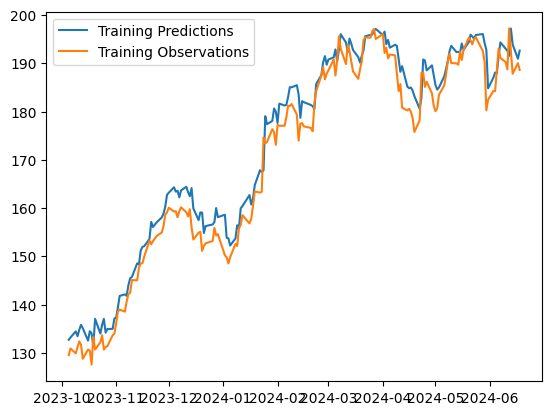

In [13]:
train_predict = model.predict(x_train).flatten()

plt.plot(dates_train, train_predict)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_training.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


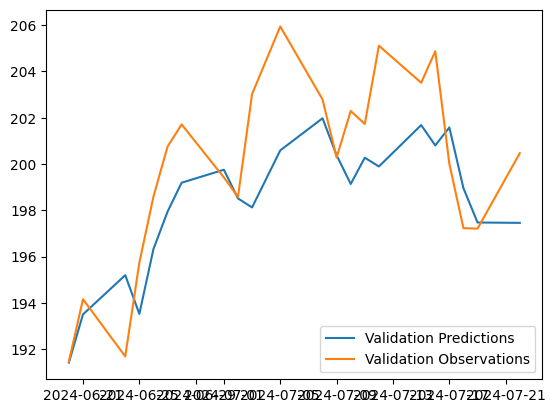

In [14]:
val_predict = model.predict(x_val).flatten()

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_validation.png"
plt.savefig(save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


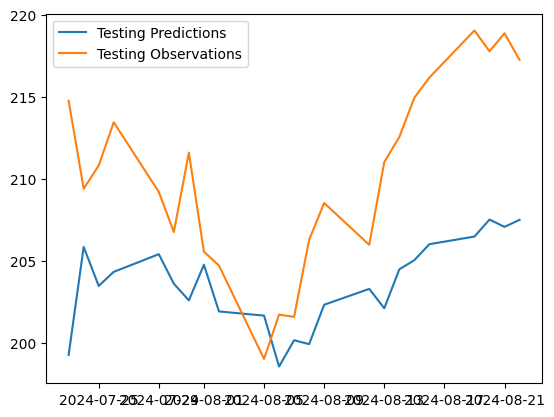

In [15]:
test_predict = model.predict(x_test).flatten()

plt.plot(dates_test, test_predict)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

save_path = 'outputs/' + truncated_name + '/' + truncated_name + "_testing.png"
plt.savefig(save_path)

In [16]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.
